In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
n = 10
trial = 10000
q_star = np.random.normal(0, 1, n)

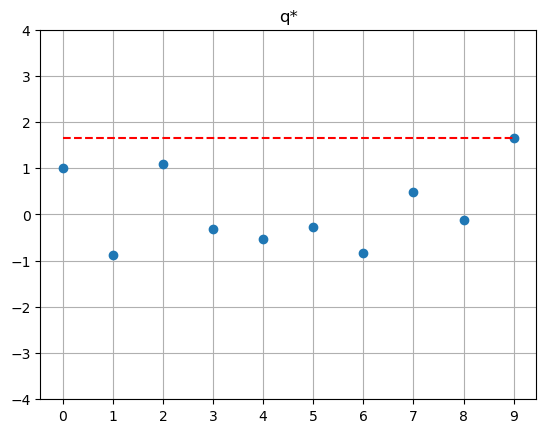

In [190]:
plt.plot(q_star, 'o')
plt.plot(range(0, n), max(q_star) * np.ones(n), 'r--')

plt.title('q*')
plt.ylim(-4, 4)
plt.xticks(range(0, n))
plt.grid()
plt.show()

In [191]:
def bandit(q_star, epsilon, trial, c=0):
    n = len(q_star)
    Q = np.zeros(n)
    N = np.zeros(n)

    action_log = []
    reward_log = []

    for step in range(trial):
        if epsilon < np.random.random():
            a = np.argmax(Q + c * np.sqrt(np.log(step+1) / (N+0.001)))
            action_log.append(a)
        else:
            a = np.random.randint(n)
            action_log.append(a)
        
        r = np.random.normal(q_star[a], 1)
        reward_log.append(r)
        N[a] += 1
        Q[a] += (r-Q[a]) / N[a]
    
    return action_log, reward_log

In [192]:
a1, r1 = bandit(q_star, 0, trial, c=2)
a2, r2 = bandit(q_star, 0.1, trial)

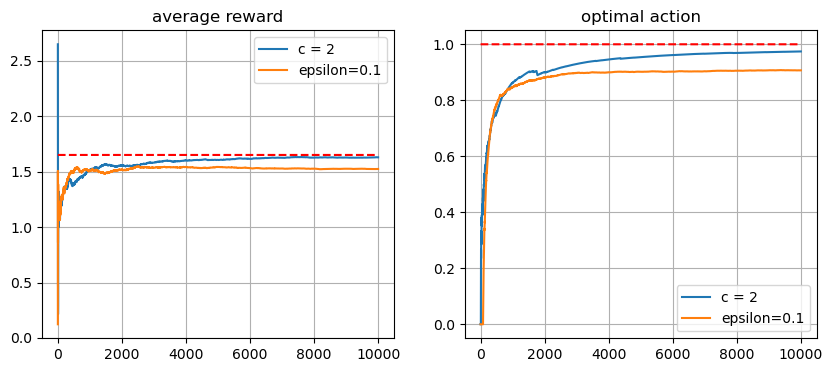

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(np.cumsum(r1) / np.arange(1, trial+1), label='c = 2')
ax[0].plot(np.cumsum(r2) / np.arange(1, trial+1), label='epsilon=0.1')
ax[0].plot(np.ones(trial) * max(q_star), 'r--')

ax[0].set_title('average reward')
ax[0].legend()
ax[0].grid()

ax[1].plot(np.cumsum(np.array(a1) == np.argmax(q_star)) / np.arange(1, trial+1), label='c = 2')
ax[1].plot(np.cumsum(np.array(a2) == np.argmax(q_star)) / np.arange(1, trial+1), label='epsilon=0.1')
ax[1].plot(np.ones(trial), 'r--')

ax[1].set_title('optimal action')
ax[1].legend()
ax[1].grid()
plt.show()

plt.show()